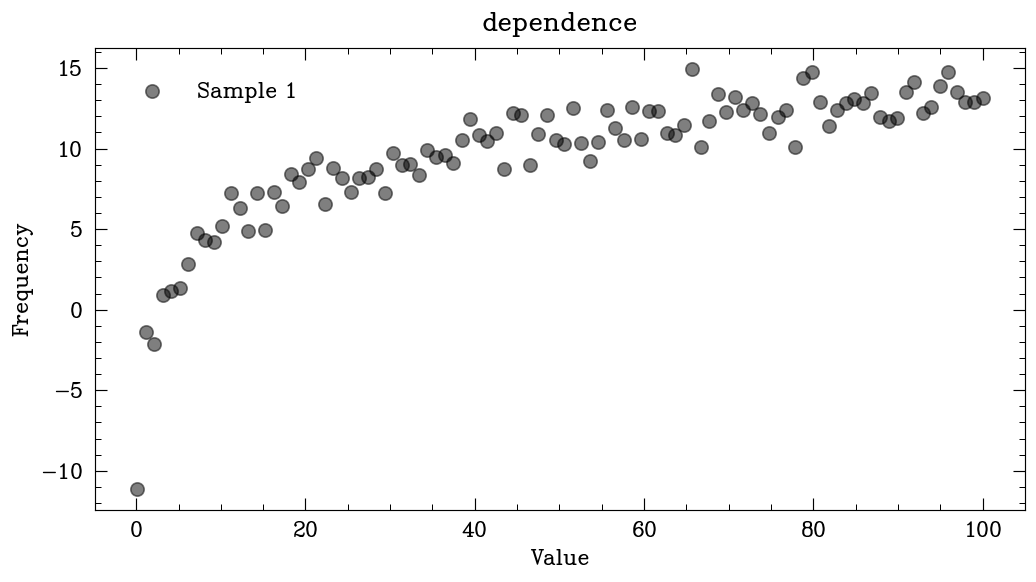

In [337]:
import numpy as np
from scipy.stats import chi2, ks_2samp, chisquare, ks_1samp
import matplotlib.pyplot as plt
import smplotlib
import seaborn as sns
import pandas as pd
import math as mth

df = pd.read_csv('data.csv')
x = df.x
y = df.y

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5, label='Sample 1')
plt.legend()
plt.title('dependence')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [338]:
def fsqrt(x, a, b, c):
    return a*x**b+c

from scipy.optimize import curve_fit
param_lin, covariance = curve_fit(fsqrt, x, y, maxfev=2000)
ysqrt = fsqrt(x, *param_lin)

In [339]:
observed = y
expected = ysqrt

chi_statistic = np.sum((observed - expected) ** 2 / expected)
degrees_of_freedom = len(expected) - 1
critical_value = chi2.ppf(0.95, degrees_of_freedom)

print(f"Chi-Square Statistic: {chi_statistic}")
print(f"Critical Value: {critical_value}")
print(f"Chi-Square Test Result: {chi_statistic > critical_value}")

Chi-Square Statistic: 5.491701321014194
Critical Value: 123.2252214533618
Chi-Square Test Result: False


In [340]:
pdf, bins_edges = np.histogram(
   observed,        # array of data
   bins=30,    # specify the number of bins for distribution function
   density=True # True to return probability density function (pdf) instead of count
   )
cdf_sample = np.cumsum(pdf*np.diff(bins_edges))

pdf, bins_edges = np.histogram(
   expected,        # array of data
   bins=30,    # specify the number of bins for distribution function
   density=True # True to return probability density function (pdf) instead of count
   )
cdf_exp = np.cumsum(pdf*np.diff(bins_edges))

ks_statistic, ks_p_value = ks_2samp(cdf_sample, cdf_exp)

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
print(f"KS Test Result: {ks_p_value > 0.05}")

KS Statistic: 0.06666666666666667
P-value: 0.9999999909208507
KS Test Result: True


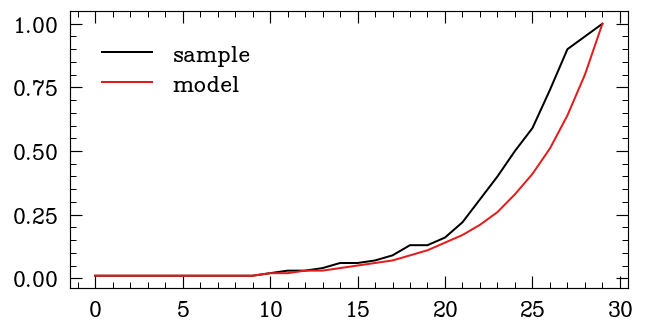

In [341]:
fig, ax = plt.subplots(figsize=(6, 3))
plt.plot(cdf_sample, label='sample')
plt.plot(cdf_exp, label='model')
plt.legend()
plt.show()